## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128]):
    input_layer=keras.layers.Input(input_shape)
    
    for i ,n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
    out=keras.layers.Dense(output_units,activation='softmax',name='output')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [7]:
#設定超參數
lr_r=[1e-1,1e-2,1e-3,1e-4,1e-5]
epochs=50
batch_size=256
momentum=0.95


In [18]:
results = {}

for lr in lr_r:
    keras.backend.clear_session()
    print('Experiment with LR=%.6f'%(lr))
    model=build_mlp(x_train.shape[1:])
    model.summary()
    optimizer=keras.optimizers.SGD(lr=lr,nesterov=True,momentum=momentum)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train,y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(x_test,y_test),
             shuffle=True)
    
    train_loss=model.history.history['loss']
    valid_loss=model.history.history['val_loss']
    train_acc=model.history.history['accuracy']
    valid_acc=model.history.history['val_accuracy']
    
    diff_lr='lr-%s'%str(lr)
    results[diff_lr]={'train-loss': train_loss,
                      'valid-loss': valid_loss,
                      'train-acc': train_acc,
                      'valid-acc': valid_acc}


Experiment with LR=0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4768 - accuracy: 0.4801 - val_loss: 1.6722 - val_accuracy: 0.4288
Epoch 50/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.4802 - accuracy: 0.4765 - val_loss: 1.8431 - val_accuracy: 0.3783
Experiment with LR=0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________________________

50000/50000 [==============================] - 11s 224us/step - loss: 1.6515 - accuracy: 0.4215 - val_loss: 1.6302 - val_accuracy: 0.4281
Epoch 5/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.6069 - accuracy: 0.4375 - val_loss: 1.5956 - val_accuracy: 0.4374
Epoch 6/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.5695 - accuracy: 0.4479 - val_loss: 1.5742 - val_accuracy: 0.4427
Epoch 7/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.5387 - accuracy: 0.4601 - val_loss: 1.5474 - val_accuracy: 0.4520
Epoch 8/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5118 - accuracy: 0.4692 - val_loss: 1.5399 - val_accuracy: 0.4570
Epoch 9/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4840 - accuracy: 0.4794 - val_loss: 1.5115 - val_accuracy: 0.4663
Epoch 10/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.4579 - accuracy: 0.4887 - val_los

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 31/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1116 - accuracy: 0.6083 - val_loss: 1.3455 - val_accuracy: 0.5287
Epoch 32/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.0989 - accuracy: 0.6147 - val_loss: 1.3286 - val_accuracy: 0.5290
Epoch 33/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.0855 - accuracy: 0.6180 - val_loss: 1.3469 - val_accuracy: 0.5281
Epoch 34/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.0724 - accuracy: 0.6219 - val_loss: 1.3449 - val_accuracy: 0.5327
Epoch 35/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.0594 - accuracy: 0.6281 - val_loss: 1.3572 - val_accuracy: 0.5230
Epoch 36/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.0475 - accuracy: 0.6306 - val_loss: 1.3286 - val_accuracy: 0.5323
Epoch 37/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.0341 - accuracy: 0.6365

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



50000/50000 [==============================] - 7s 134us/step - loss: 1.7893 - accuracy: 0.3740 - val_loss: 1.7881 - val_accuracy: 0.3711
Epoch 15/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7794 - accuracy: 0.3767 - val_loss: 1.7783 - val_accuracy: 0.3742
Epoch 16/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7703 - accuracy: 0.3808 - val_loss: 1.7691 - val_accuracy: 0.3779
Epoch 17/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7607 - accuracy: 0.3835 - val_loss: 1.7604 - val_accuracy: 0.3777
Epoch 18/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7526 - accuracy: 0.3871 - val_loss: 1.7526 - val_accuracy: 0.3822
Epoch 19/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7442 - accuracy: 0.3904 - val_loss: 1.7432 - val_accuracy: 0.3907
Epoch 20/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7362 - accuracy: 0.3934 - val_loss:

Epoch 12/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.1536 - accuracy: 0.2318 - val_loss: 2.1492 - val_accuracy: 0.2421
Epoch 13/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1440 - accuracy: 0.2385 - val_loss: 2.1399 - val_accuracy: 0.2472
Epoch 14/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.1347 - accuracy: 0.2430 - val_loss: 2.1308 - val_accuracy: 0.2515
Epoch 15/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.1257 - accuracy: 0.2485 - val_loss: 2.1219 - val_accuracy: 0.2551
Epoch 16/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.1168 - accuracy: 0.2530 - val_loss: 2.1133 - val_accuracy: 0.2593
Epoch 17/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.1083 - accuracy: 0.2561 - val_loss: 2.1049 - val_accuracy: 0.2630
Epoch 18/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.1000 - accuracy: 0.2605

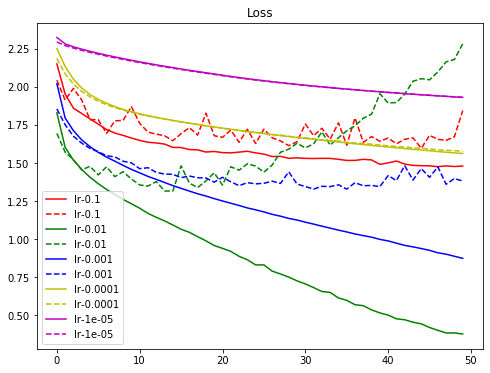

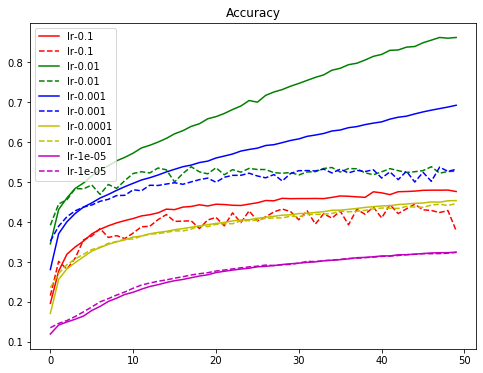

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(epochs),results[cond]['train-loss'], '-', label=cond,color=color_bar[i])
    plt.plot(range(epochs),results[cond]['valid-loss'], '--', label=cond,color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(epochs),results[cond]['train-acc'], '-', label=cond,color=color_bar[i])
    plt.plot(range(epochs),results[cond]['valid-acc'], '--', label=cond,color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
